In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

In [2]:
# Load the dataset
df = pd.read_csv('GOOGL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
4430,2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900


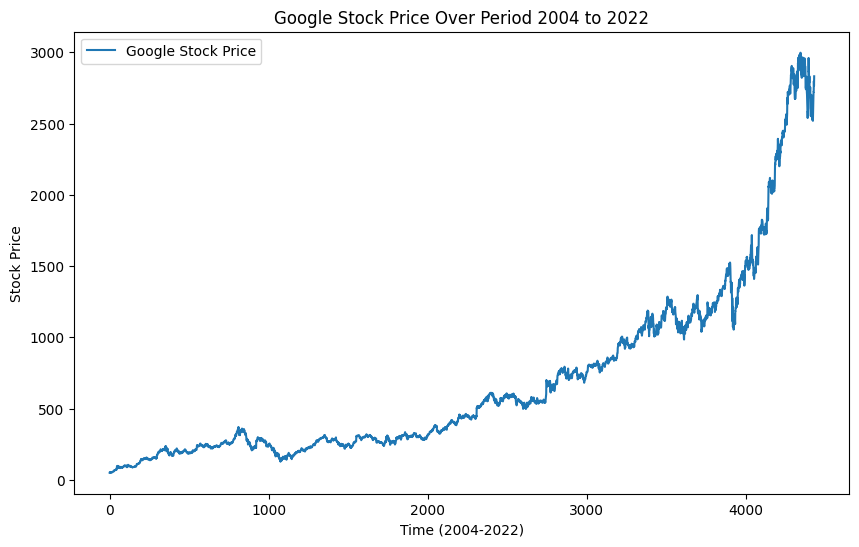

In [5]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Google Stock Price')
plt.xlabel('Time (2004-2022)')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Over Period 2004 to 2022')
plt.legend()
plt.show()

In [6]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close_scaled'] = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [7]:
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

In [8]:
time_steps = 30  # Number of time steps to look back
X, y = create_dataset(df['Close_scaled'].values, time_steps)

In [9]:
# Split the dataset into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [10]:
print(split)

3520


In [11]:
df.iloc[3520]

Date             2018-08-13
Open            1251.199951
High            1265.969971
Low             1247.030029
Close           1248.640015
Adj Close       1248.640015
Volume              1375000
Close_scaled       0.406753
Name: 3520, dtype: object

In [12]:
# Build the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Measure training time
start_time = time.time()

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10

88/88 [==============================] - 10s 52ms/step - loss: 4.0711e-04 - val_loss: 1.5294e-04
Epoch 2/10
88/88 [==============================] - 3s 36ms/step - loss: 2.4678e-05 - val_loss: 1.1988e-04
Epoch 3/10
88/88 [==============================] - 3s 36ms/step - loss: 2.4448e-05 - val_loss: 1.7210e-04
Epoch 4/10
88/88 [==============================] - 3s 36ms/step - loss: 2.4573e-05 - val_loss: 1.4247e-04
Epoch 5/10
88/88 [==============================] - 3s 36ms/step - loss: 2.5690e-05 - val_loss: 8.7507e-05
Epoch 6/10
88/88 [==============================] - 3s 36ms/step - loss: 2.1163e-05 - val_loss: 1.0805e-04
Epoch 7/10
88/88 [==============================] - 3s 37ms/step - loss: 1.9360e-05 - val_loss: 1.0366e-04
Epoch 8/10
88/88 [==============================] - 3s 36ms/step - loss: 1.8828e-05 - val_loss: 1.0828e-04
Epoch 9/10
88/88 [==============================] - 3s 37ms/step - loss: 1.7778e-05 - val_loss: 9.9707e-05
Epoch 10/10
88/88 [================

In [16]:
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

Training Time: 39.037747859954834 seconds


In [17]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

28/28 [==============================] - 2s 15ms/step - loss: 4.2428e-04
Test Loss: 0.000424279976869002


In [18]:
# Measure prediction time
start_time = time.time()

In [19]:
# Make predictions
predictions = model.predict(X_test)

28/28 [==============================] - 2s 15ms/step


In [20]:
prediction_time = time.time() - start_time
print("Prediction Time:", prediction_time, "seconds")

Prediction Time: 2.110128164291382 seconds


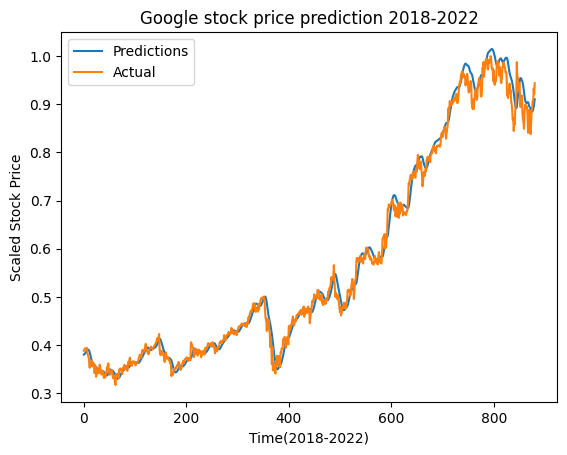

In [21]:
# Plot predictions vs actual
plt.plot(predictions, label='Predictions')
plt.plot(y_test, label='Actual')
plt.xlabel('Time(2018-2022)')
plt.ylabel('Scaled Stock Price')
plt.title("Google stock price prediction 2018-2022")
plt.legend()
plt.show()


We load the Google stock prices dataset and preprocess it by scaling the 'Close' prices between 0 and 1.
We create sequences of input-output pairs for training the RNN model.
We split the dataset into training and testing sets.
We define an RNN model using LSTM layers.
We compile the model with mean squared error loss and the Adam optimizer.
We train the model on the training data.
We evaluate the model on the testing data and print the test loss.
We make predictions using the trained model and plot them against the actual stock prices.